# Principal Component Analysis

### Import packages
Import pandas and numpy for URL based reading of data and conversion to numpy array. Then import hoggorm and hoggormplot for PCA analysis and visualization. Finally, import pyplot from matplotlib to enable custom plots not covered by hoggormplot.

In [1]:
import pandas as pd
import numpy as np
import hoggorm as hogg
import hoggormplot as hplot
import matplotlib.pyplot as plt

## Principal Component Analysis in sensometrics

### Read data
Read cheese sensory data in white space separated, header-less table format from GitHub into numpy array.

In [2]:
sensory = np.array(pd.read_table('https://raw.githubusercontent.com/khliland/hoggormExamples/master/data/cheese_sensory.txt', \
                             header = None, sep = '\s+'))

### Perform PCA on sensory data
Extract 4 principal components using the Non-Linear Partial Least Squares (NIPALS) based PCA version and use leave-one-out cross-validation for model evaluation/summaries.

In [3]:
SENSORYpca = hogg.nipalsPCA(sensory, 4, cvType = ["loo"])

loo


### Numerical output
Show cummulative explained variance: $$R^2 = 1-\frac{SSE}{SST}$$ and cross-validated root mean squared error: $$RMSECV = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i-\hat{y}_i)^2}$$.

In [4]:
SENSORYpca.X_cumCalExplVar()

[0.0,
 91.7110917587228,
 95.49561106407435,
 97.43426524421265,
 98.61111614202403]

In [5]:
SENSORYpca.X_RMSECV()

array([0.70868365, 0.22749453, 0.19966384, 0.15746787, 0.12862758])

### Plotting
The explained variance shows what percentage of the spectral variation is covered by the PCA up to a chosen number of components.

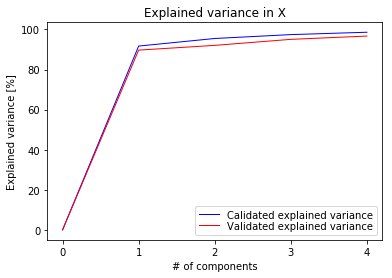

In [6]:
hplot.explainedVariance(SENSORYpca)

The score plot shows how the sensory assessments relate to each other in a two dimensional compressed space. Calibrated explained variances for the axes are indicated on the axes.

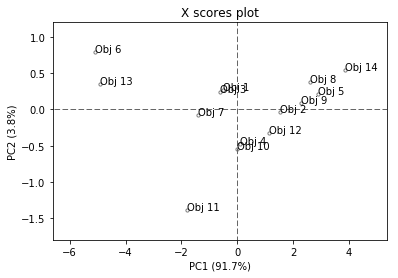

In [7]:
hplot.scores(SENSORYpca)

## Principal Component Analysis in spectroscopy

### Read data
Read gasoline NIR data in white space separated, header-less table format from GitHub into numpy array.

In [2]:
NIR = np.array(pd.read_table('https://raw.githubusercontent.com/khliland/hoggormExamples/master/data/gasoline_NIR.txt', \
                             header = None, sep = '\s+'))

### Perform PCA on NIR data
Extract 5 principal components using the Non-Linear Partial Least Squares (NIPALS) based PCA version and use leave-one-out cross-validation for model evaluation/summaries.

In [3]:
NIRpca = hogg.nipalsPCA(NIR, 5, cvType = ["loo"])

loo


### Numerical output
Show cummulative explained variance and cross-validated root mean squared error.

In [4]:
NIRpca.X_cumCalExplVar()

[0.0,
 72.56513778756599,
 83.90315664954667,
 90.85741331322271,
 95.45723968677967,
 96.69753691367416]

In [5]:
NIRpca.X_RMSECV()

array([0.01242244, 0.00664163, 0.0052575 , 0.00408688, 0.00288006,
       0.00255493])

### Plotting
The explained variance shows what percentage of the spectral variation is covered by the PCA up to a chosen number of components.

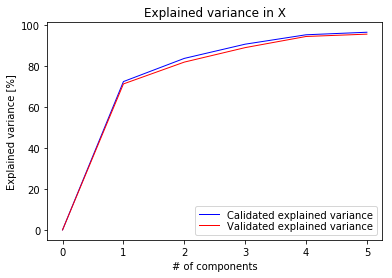

In [6]:
hplot.explainedVariance(NIRpca)

The score plot shows how the NIR measurements relate to each other in a two dimensional compressed space. Calibrated explained variances for the axes are indicated on the axes.

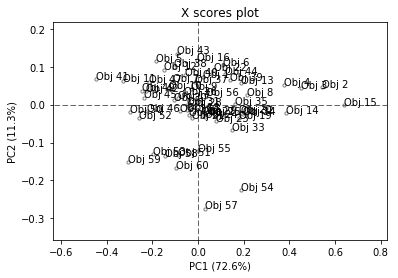

In [7]:
hplot.scores(NIRpca)

Loadings from PCA on spectral data are best visualized as line plots. The loadings show how much weight each wavelength index is given when producing the principal components. For the gasoline data it seems that the highest variation is spanned by variables around indexes 150, 240 and 390.

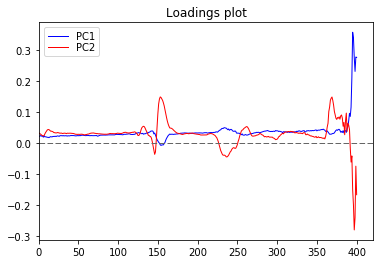

In [8]:
hplot.loadings(NIRpca, line=True)

### Custom plots:
The NIR spectra are also associated with octane measurements. If we read these and use them to colour the score plot, we see that the major variation in the NIR spectra have little to do with the variation in octane.

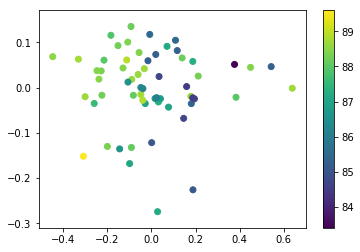

In [9]:
octane = np.array(pd.read_table('https://raw.githubusercontent.com/khliland/hoggormExamples/master/data/gasoline_octane.txt', \
                             header = None, sep = '\s+'))
scores = NIRpca.X_scores()[:,:2]
plt.scatter(scores[:,0],scores[:,1], c = octane)
plt.colorbar()
plt.show()